# RTS grid: comparing the power flow results between MATPOWER and pandapower

In [1]:
from main import *
import matplotlib.pyplot as plt

In [2]:
os.chdir("..")

In [3]:
net = pp.converter.from_mpc(os.path.join("reference-matpower", "RTS_GMLC", "RTS_GMLC.mat"))

15:41:11 pandapower.converter.matpower.from_mpc INFO added fields ['areas', 'bus_name', 'gen_name'] in mpc_additional_data


In [4]:
net.bus.name = net.bus.name.astype(int) + 1

In [5]:
pp.runpp(net)

# Bus voltages

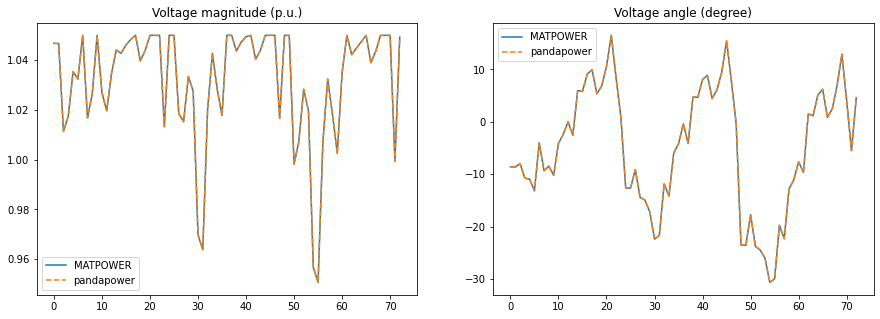

In [6]:
resbus = pd.read_csv(os.path.join("reference-matpower", "RTS_GMLC", "results", "resbus.csv"), header=None)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
resbus[7].plot(ax=ax1, label="MATPOWER")
net.res_bus.vm_pu.plot(ax=ax1, linestyle="--", label="pandapower")
resbus[8].plot(ax=ax2, label="MATPOWER")
net.res_bus.va_degree.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("Voltage magnitude (p.u.)")
ax2.set_title("Voltage angle (degree)")
ax1.legend()
ax2.legend()

# Bus voltages (old reference file)

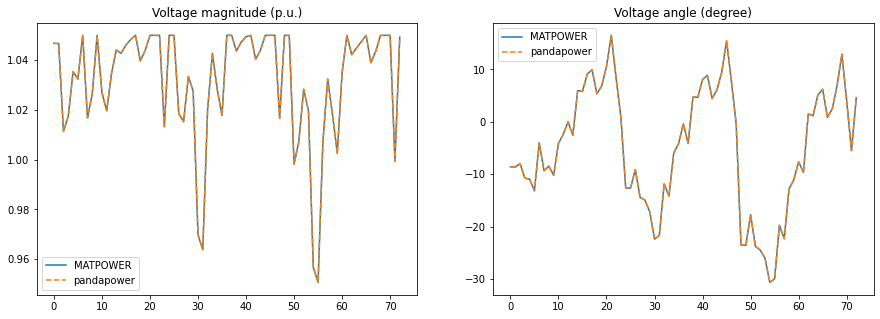

In [7]:
resbus_old = pd.read_csv(os.path.join("reference-matpower", "RTS_GMLC", "results", "bus.csv"))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
resbus_old["v_mag"].plot(ax=ax1, label="MATPOWER")
net.res_bus.vm_pu.plot(ax=ax1, linestyle="--", label="pandapower")
ax2.plot(np.rad2deg(resbus_old["v_ang"]), label="MATPOWER")
net.res_bus.va_degree.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("Voltage magnitude (p.u.)")
ax2.set_title("Voltage angle (degree)")
ax1.legend()
ax2.legend()

# Line power injections

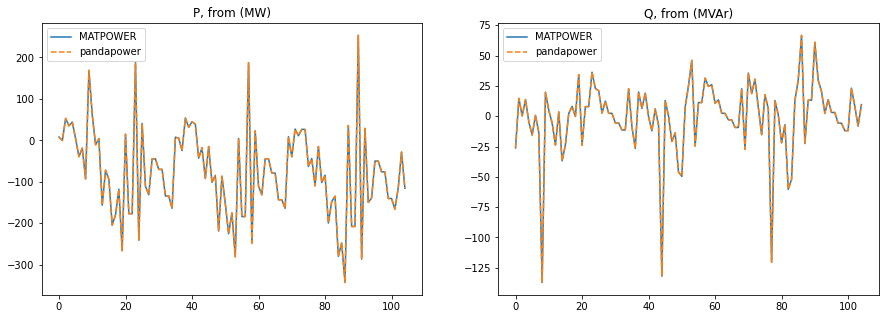

In [8]:
resline = pd.read_csv(os.path.join("reference-matpower", "RTS_GMLC", "results", "resline.csv"), header=None)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
resline[13].plot(ax=ax1, label="MATPOWER")
net.res_line.p_from_mw.plot(ax=ax1, linestyle="--", label="pandapower")
resline[14].plot(ax=ax2, label="MATPOWER")
net.res_line.q_from_mvar.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("P, from (MW)")
ax2.set_title("Q, from (MVAr)")
ax1.legend()
ax2.legend()

# Transformer power injections (HV)

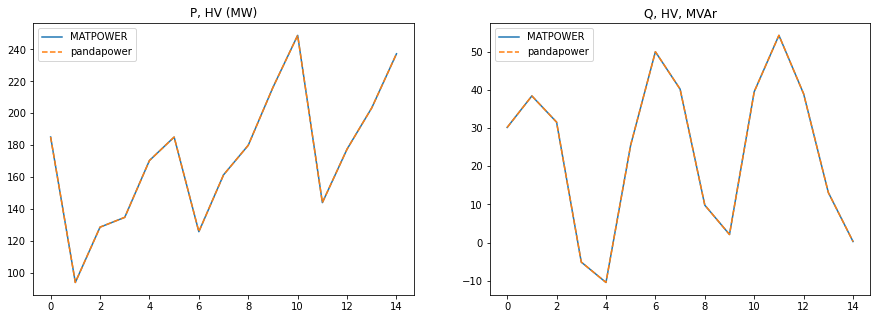

In [9]:
restrafo = pd.read_csv(os.path.join("reference-matpower", "RTS_GMLC", "results", "restrafo.csv"), header=None)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
restrafo[15].plot(ax=ax1, label="MATPOWER")
net.res_trafo.p_hv_mw.plot(ax=ax1, linestyle="--", label="pandapower")
restrafo[16].plot(ax=ax2, label="MATPOWER")
net.res_trafo.q_hv_mvar.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("P, HV (MW)")
ax2.set_title("Q, HV, MVAr")
ax1.legend()
ax2.legend()